In [1]:
# Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sns
import sys
sys.setrecursionlimit(1500)
%matplotlib inline

In [2]:
df_model = pd.read_csv('최종데이터/create_train_1.csv')
df_model

,text,label
0,"Subject: Coffee and Chit-Chat\n\nHey Olivia,\n...",ham
1,Subject: Reconnect with Nature: Join our Fores...,spam
2,"Hi Clever,\n\nI appreciate your bringing up yo...",ham
3,We have an incredible deal waiting for you. Ac...,spam
4,Are you tired of living paycheck to paycheck? ...,spam
...,...,...
1234,"Hi Mark,\n\nNew series alert! Let's binge-watc...",ham
1235,Confidential message: You have been selected t...,spam
1236,Imagine doubling your income without any hassl...,spam
1237,"Hey comina,\n\nGet your dancing shoes ready be...",ham


In [3]:
df_unseen_test = pd.read_csv('최종데이터/create_test_1.csv')
df_unseen_test

,text,label
0,Subject: Limited Spots Left - Grab Yours Now! ...,spam
1,"Hi jane,\n\nKeep creating and exploring your p...",ham
2,Subject: No More Debt Worries: Recover Instant...,spam
3,Subject: A Truly Joyful Trip\nHi Jinger@@@\nI ...,ham
4,Grateful for our friendship. You mean a lot to...,ham
...,...,...
195,Subject: Your Guaranteed Satisfaction\n\nHi ma...,spam
196,Looking for a bargain? Compare rates and save ...,spam
197,"Hello clinst,\n\nElevate your education with o...",spam
198,Subject: Request for Exchange due to iPad Soun...,ham


In [4]:
NEWLINE = '\n'

def token_count(row):
    'returns token count'
    text=row['tokenized_text']
    length=len(text.split())
    return length

def tokenize(row):
    "tokenize the text using default space tokenizer"
    text=row['text']
    lines=(line for line in text.split(NEWLINE) )
    tokenized=""
    for sentence in lines:
        tokenized+= " ".join(tok for tok in sentence.split())
    return tokenized

In [5]:
df_model['tokenized_text']=df_model.apply(tokenize, axis=1)
df_model['token_count']=df_model.apply(token_count, axis=1)
df_model['lang']='en'
df_model.head()

,text,label,tokenized_text,token_count,lang
0,"Subject: Coffee and Chit-Chat\n\nHey Olivia,\n...",ham,"Subject: Coffee and Chit-ChatHey Olivia,Hope y...",44,en
1,Subject: Reconnect with Nature: Join our Fores...,spam,Subject: Reconnect with Nature: Join our Fores...,37,en
2,"Hi Clever,\n\nI appreciate your bringing up yo...",ham,"Hi Clever,I appreciate your bringing up your c...",19,en
3,We have an incredible deal waiting for you. Ac...,spam,We have an incredible deal waiting for you. Ac...,18,en
4,Are you tired of living paycheck to paycheck? ...,spam,Are you tired of living paycheck to paycheck? ...,53,en


In [6]:
df_unseen_test['tokenized_text']=df_unseen_test.apply(tokenize, axis=1)
df_unseen_test['token_count']=df_unseen_test.apply(token_count, axis=1)
df_unseen_test['lang']='en'
df_unseen_test.head()

,text,label,tokenized_text,token_count,lang
0,Subject: Limited Spots Left - Grab Yours Now! ...,spam,Subject: Limited Spots Left - Grab Yours Now! ...,33,en
1,"Hi jane,\n\nKeep creating and exploring your p...",ham,"Hi jane,Keep creating and exploring your passi...",11,en
2,Subject: No More Debt Worries: Recover Instant...,spam,Subject: No More Debt Worries: Recover Instant...,27,en
3,Subject: A Truly Joyful Trip\nHi Jinger@@@\nI ...,ham,Subject: A Truly Joyful TripHi Jinger@@@I can'...,55,en
4,Grateful for our friendship. You mean a lot to...,ham,Grateful for our friendship. You mean a lot to...,10,en


In [7]:
# Lets look at some information related to the data
print("total emails : ", len(df_model))
print  ("total spam emails : ", len(df_model[df_model['label']=='spam']) )
print  ("total normal emails : ", len(df_model[df_model['label']=='ham']) )

total emails :  1239
total spam emails :  613
total normal emails :  626


Text(0.5, 1.0, 'Token length Vs Frequency for Enron Spam Emails')

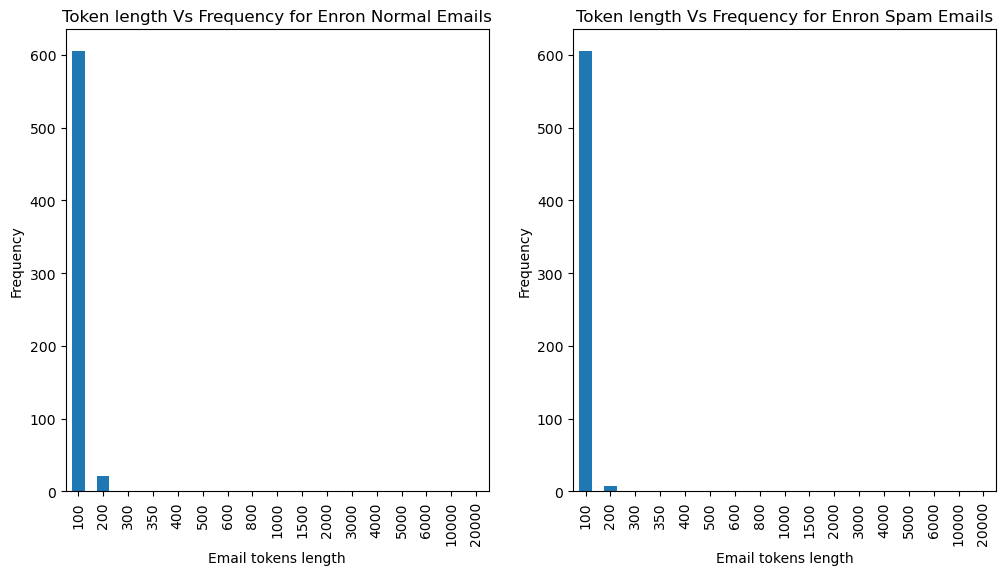

In [8]:
bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_model_sub=df_model[ (df_model['lang']=='en') & (df_model['label']=='ham')]
df_model1 = df_model_sub.groupby(pd.cut(df_model_sub['token_count'], bins=bins)).token_count.count()
df_model1.index=[a.right for a in df_model1.index]
res1=df_model1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_model_sub=df_model[ (df_model['lang']=='en') & (df_model['label']=='spam')]
df_model1 = df_model_sub.groupby(pd.cut(df_model_sub['token_count'], bins=bins)).token_count.count()
df_model1.index=[a.right for a in df_model1.index]
res2=df_model1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

## Model

In [9]:
import keras

from keras.layers import Input, Dense
from keras.models import Model,load_model
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard

In [10]:
import sklearn
from sklearn import metrics
from sklearn import svm
import joblib
from sklearn.preprocessing import LabelEncoder

In [11]:
# max number of features
num_max = 200

In [12]:
def train_tf_idf_model(texts):
    "train tf idf model "
    tic = time.process_time()
    

    tok = Tokenizer(num_words=num_max)
    tok.fit_on_texts(texts)
    toc = time.process_time()

    print (" -----total Computation time = " + str((toc - tic)) + " seconds")
    return tok


def prepare_model_input(tfidf_model,dataframe,mode='tfidf'):
    
    "function to prepare data input features using tfidf model"
    tic = time.process_time()
    
    le = LabelEncoder()
    sample_texts = list(dataframe['tokenized_text'])
    sample_texts = [' '.join(x.split()) for x in sample_texts]
    
    targets=list(dataframe['label'])
    targets = [1. if x=='spam' else 0. for x in targets]
    sample_target = le.fit_transform(targets)
    
    if mode=='tfidf':
        sample_texts=tfidf_model.texts_to_matrix(sample_texts,mode='tfidf')
    else:
        sample_texts=tfidf_model.texts_to_matrix(sample_texts)
    
    toc = time.process_time()
    
    print('shape of labels: ', sample_target.shape)
    print('shape of data: ', sample_texts.shape)
    
    print (" -----total Computation time for preparing model data = " + str((toc - tic)) + " seconds")
    
    return sample_texts,sample_target

In [13]:
texts=list(df_model['tokenized_text'])
tfidf_model=train_tf_idf_model(texts)

 -----total Computation time = 0.078125 seconds


In [14]:
# prepare model input data
mat_texts,tags=prepare_model_input(tfidf_model,df_model,mode='tfidf')

shape of labels:  (1239,)
shape of data:  (1239, 200)
 -----total Computation time for preparing model data = 0.25 seconds


# Split Train/validation data 

We will use 85% for training, 15% for validation. 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(mat_texts, tags, test_size=0.15, random_state=42)
print ('train data shape: ', X_train.shape, y_train.shape)
print ('validation data shape :' , X_val.shape, y_val.shape)

train data shape:  (1053, 200) (1053,)
validation data shape : (186, 200) (186,)


In [16]:
X_train

array([[0.        , 2.52959479, 2.24538985, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.94095259, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.453872  , 1.59317122, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.453872  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.453872  , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
model_save_path="checkpoints/spam_detector_enron_model3.h5"

In [18]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras.metrics.binary_accuracy])
    print('compile done')
    return model

def check_model(model,x,y,epochs=2):
    history=model.fit(x,y,batch_size=32,epochs=epochs,verbose=1,shuffle=True,validation_split=0.2,
              callbacks=[checkpointer, tensorboard]).history
    return history


def check_model2(model,x_train,y_train,x_val,y_val,epochs=10):
    history=model.fit(x_train,y_train,batch_size=64,
                      epochs=epochs,verbose=1,
                      shuffle=True,
                      validation_data=(x_val, y_val),
                      callbacks=[checkpointer, tensorboard]).history
    return history

# define checkpointer
checkpointer = ModelCheckpoint(filepath=model_save_path,
                               verbose=1,
                               save_best_only=True)    

# define tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)


# define the predict function for the deep learning model for later use
def predict(data):
    result=model.predict(data)
    prediction = [round(x[0]) for x in result]
    return prediction

## Model train

In [21]:
# get the compiled model
model = get_simple_model()

# load history
# history=check_model(m,mat_texts,tags,epochs=10)
history=check_model2(model,X_train,y_train,X_val,y_val,epochs=30)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               102912    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 234497 (916.00 KB)
Trainable params: 234497 (916.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
compile done
E

17/17 [==============================] - 0s 14ms/step - loss: 8.1898e-04 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0096 - val_acc: 1.0000 - val_binary_accuracy: 1.0000
Epoch 22/30
17/17 [==============================] - ETA: 0s - loss: 4.2210e-04 - acc: 1.0000 - binary_accuracy: 1.0000
Epoch 22: val_loss did not improve from 0.00962
17/17 [==============================] - 0s 11ms/step - loss: 4.2210e-04 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0099 - val_acc: 0.9946 - val_binary_accuracy: 0.9946
Epoch 23/30
16/17 [===========================>..] - ETA: 0s - loss: 4.2830e-04 - acc: 1.0000 - binary_accuracy: 1.0000
Epoch 23: val_loss did not improve from 0.00962
17/17 [==============================] - 0s 11ms/step - loss: 4.2031e-04 - acc: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0099 - val_acc: 0.9946 - val_binary_accuracy: 0.9946
Epoch 24/30
17/17 [==============================] - ETA: 0s - loss: 4.4867e-04 - acc: 1.0000 - binary_accuracy: 1.0000
Epoc

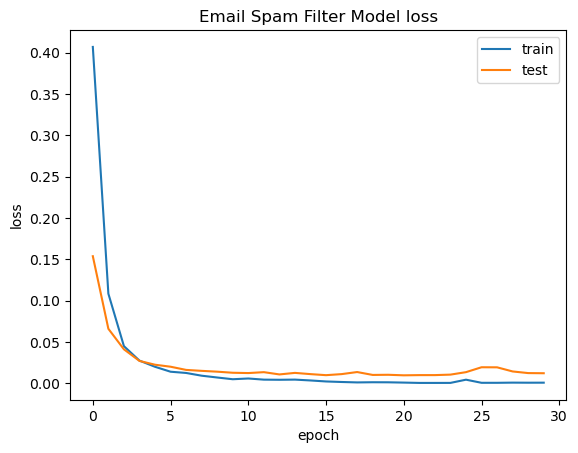

In [22]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

## Model Performance

In [23]:
sample_texts,sample_target=prepare_model_input(tfidf_model,df_unseen_test,mode='')

shape of labels:  (200,)
shape of data:  (200, 200)
 -----total Computation time for preparing model data = 0.03125 seconds


In [24]:
# lets write a function to create the dataframe of the results from all the models
model_dict={}
model_dict['deep_learning']=model


def getResults(model_dict,sample_texts,sample_target):
    '''
    Get results from different models
    '''
    results=[]
    
    results_cm={}
    
    for name,model in model_dict.items():
#         print(name)
        tic1 = time.process_time()
        if name in 'deep_learning':
            predicted_sample = predict(sample_texts)
        else:    
            predicted_sample = model.predict(sample_texts)
        toc1 = time.process_time()
#         print(predicted_sample)

        cm=sklearn.metrics.confusion_matrix(sample_target, predicted_sample)
        results_cm[name]=cm
        
        total=len(predicted_sample)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        
        time_taken=round(toc1 - tic1,4)
        res=sklearn.metrics.precision_recall_fscore_support(sample_target, predicted_sample)
        results.append([name,np.mean(res[0]),np.mean(res[1]),np.mean(res[2]),total,TP,FP,FN,TN,str(time_taken)] )
        
        
    
    df_cols=['model','precision','recall','f1_score','Total_samples','TP','FP','FN','TN','execution_time']
    result_df=pd.DataFrame(results,columns=df_cols)
    
    return result_df,results_cm

In [25]:
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

7/7 [==============================] - 0s 5ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.979381,0.981308,0.97995,200,93,0,4,103,0.2969


In [26]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['normal', 'spam'])
    df_cm2.columns=['normal','spam']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()
    return

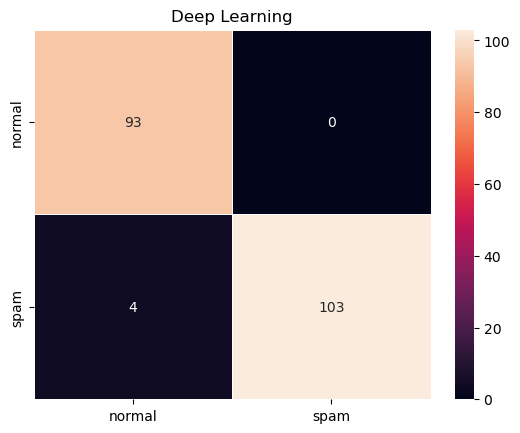

In [27]:
plot_heatmap(results_cm['deep_learning'],'Deep Learning')

## 다른 테스트 셋
### image

In [28]:
image = pd.read_csv('최종데이터/image_test_1.csv')
image

,text,label
0,\nADS FOR MONSTERS\nMADHOUSE SALUTES THE TRANS...,ham
1,\nBest stock Pick for this Year.\nGet ARSS Fir...,spam
2,\n• Lowest Price Guarantee Fast Delivery\nFor ...,spam
3,\nLOUIS VUITTON\nPARIS\nmade in France,ham
4,\n• Lowest Price Guarantee Fast Delivery\nFor ...,spam
...,...,...
57,\nNERDS ANONYMOUS\nCreated by Jared Bonner and...,ham
58,\nCANAL DE PANAMA\nABIER\nMIRAFLORES LOCKS PAN...,ham
59,\nLowest Price Guarantee & Fast Delivery\n100%...,spam
60,\nWATCH OUT!\nSBNS MAKES A MOVE!\nWATCH SBNS T...,spam


In [29]:
image['tokenized_text']=image.apply(tokenize, axis=1)
image['token_count']=image.apply(token_count, axis=1)
image['lang']='en'

sample_texts,sample_target=prepare_model_input(tfidf_model,image,mode='')
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

shape of labels:  (62,)
shape of data:  (62, 200)
 -----total Computation time for preparing model data = 0.015625 seconds
2/2 [==============================] - 0s 18ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.811321,0.655172,0.620563,62,33,0,20,9,0.125


### collect

In [30]:
collect = pd.read_csv('최종데이터/collect_test_1.csv')
collect

,text,label
0,business in history that requires no work. NO...,spam
1,"I'm in a meeting, call me later at",ham
2,"re : var for metals\nted , anjam ' s and myse...",ham
3,My love ! How come it took you so long to leav...,ham
4,I AM AT THE GAS STATION. GO THERE.,ham
...,...,...
300,"At 17:10 22/08/2002 +0100, Nick Hilliard wrote...",spam
301,"URL: http://www.newsisfree.com/click/-2,865571...",spam
302,Welcome to UK-mobile-date this msg is FREE giv...,spam
303,"all graphics software available , cheap oem v...",spam


In [31]:
collect['tokenized_text']=collect.apply(tokenize, axis=1)
collect['token_count']=collect.apply(token_count, axis=1)
collect['lang']='en'

sample_texts,sample_target=prepare_model_input(tfidf_model,collect,mode='')
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

shape of labels:  (305,)
shape of data:  (305, 200)
 -----total Computation time for preparing model data = 0.046875 seconds
10/10 [==============================] - 0s 4ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.709891,0.637634,0.600262,305,140,10,102,53,0.1719


### create+image

In [32]:
createimage = pd.read_csv('최종데이터/createimage_test_16features.csv')
createimage

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,\nPARK HYATT TOKYOSubject: Congratulations! Yo...,0.530790,0.203366,1,0.129727,0.475949,0.356645,0.387755,0.081633,0.102041,0.081633,0.040816,0.059309,0.074385,0.010664,0.009254,spam
1,\nFNLH EXPLODES ON THE INVESTOR SCENE!!!\nTHIS...,0.377405,0.133960,0,0.223838,0.837510,0.193030,0.340996,0.068966,0.122605,0.053640,0.022989,0.171922,0.165509,0.092417,0.074148,spam
2,\nDANGER\nThis beach Lumahai is NOT A WARNING ...,0.256490,0.000000,0,0.185293,0.638729,0.505035,0.361446,0.060241,0.096386,0.060241,0.060241,0.066631,0.068221,0.021801,0.014104,ham
3,\nThis may turn out to be the most important e...,0.318424,0.123090,0,0.107310,0.742559,0.161889,0.368932,0.043689,0.123786,0.053398,0.026699,0.196847,0.210125,0.194905,0.178347,spam
4,\nGDKI.PK IS POISED TO EXPLODE!\nTHIS ONE COUL...,0.462681,0.208157,0,0.467605,0.701375,0.291156,0.512821,0.019231,0.070513,0.035256,0.016026,0.182838,0.181061,0.109005,0.094865,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,\nBIG NEWS\nARE HITTING ON FRIDAY FOR CRSVF!!!...,0.422137,0.110708,1,0.377725,0.613151,0.231352,0.479029,0.017660,0.075055,0.048565,0.015453,0.209218,0.226992,0.277251,0.275786,spam
182,\nHoodia Maximum Strength\nFinally... A Natura...,0.289102,0.096566,0,0.112412,0.631050,0.363225,0.401361,0.081633,0.122449,0.054422,0.034014,0.168511,0.186529,0.139810,0.125238,spam
183,\nLowest Price Guarantee & Fast Delivery\n100%...,0.711749,1.000000,3,0.119216,0.637573,0.440688,0.403361,0.042017,0.109244,0.016807,0.033613,0.439660,0.441485,0.225118,0.194148,spam
184,\nMastering MuseScore\nMarc Sabate\nMastering ...,0.000000,0.137235,0,0.172633,0.076582,0.922754,0.704918,0.049180,0.049180,0.049180,0.000000,0.193451,0.290367,0.125592,0.137527,spam


In [33]:
createimage['tokenized_text']=createimage.apply(tokenize, axis=1)
createimage['token_count']=createimage.apply(token_count, axis=1)
createimage['lang']='en'

sample_texts,sample_target=prepare_model_input(tfidf_model,createimage,mode='')
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

shape of labels:  (186,)
shape of data:  (186, 200)
 -----total Computation time for preparing model data = 0.03125 seconds
6/6 [==============================] - 0s 3ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.736329,0.831029,0.728036,186,42,1,45,98,0.1875


### collect_image

In [34]:
collectimage = pd.read_csv('최종데이터/collectimage_test_16features.csv')
collectimage

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,\nFeel young again with Regenisis HGH\nRegenis...,0.118319,0.028868,0,0.067479,0.290053,0.120768,0.362963,0.037037,0.140741,0.088889,0.044444,0.134549,0.136043,0.040308,0.044780,spam
1,\nSuperstar Stock Report\nSmart Money Equities...,0.129388,0.107814,2,0.159635,0.343152,0.030367,0.337097,0.074194,0.140323,0.051613,0.043548,0.126329,0.112799,0.182118,0.194045,spam
2,\nYOU'VE SEEN IT BEFORE YOU SAY? YOU AIN'T SEE...,0.194393,0.308285,0,0.276236,0.308322,0.528875,0.415842,0.016502,0.075908,0.046205,0.019802,0.066148,0.054741,0.099670,0.082251,spam
3,\n****! READ IT CAREFULLY!**\nNew Product Incr...,0.103499,0.041612,0,0.072706,0.334076,0.065231,0.341686,0.056948,0.125285,0.075171,0.041002,0.103684,0.101180,0.141810,0.145145,spam
4,\nDOE MEE\nDOE MEE DOE MEE DOE MEE DOE MEE DOE...,0.123539,0.087075,0,0.474921,0.408219,0.076128,0.581818,0.018182,0.036364,0.000000,0.018182,0.171220,0.135614,0.015024,0.011739,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"\nGet QEGY First Thing On Monday Oct 23, This ...",0.147568,0.246343,0,0.209392,0.360201,0.055422,0.368421,0.010526,0.089474,0.036842,0.015789,0.096210,0.078858,0.054232,0.051699,spam
301,\n??Lowest Price Guarantee Fast Delivery\nFor ...,0.178926,0.270859,2,0.052989,0.371872,0.142004,0.271186,0.090395,0.124294,0.050847,0.045198,0.062253,0.053874,0.055332,0.048433,spam
302,\nLOUIS VUITTON\nPARIS\nmade in FranceUrgent -...,0.111481,0.530387,0,0.308901,0.275880,0.124529,0.500000,0.031250,0.031250,0.062500,0.000000,0.086876,0.094422,0.007329,0.008396,spam
303,\nFeel young again with Regenisis HGH\nRegenis...,0.288982,0.096482,2,0.060748,0.273385,0.124622,0.307500,0.030000,0.122500,0.075000,0.045000,0.214004,0.190966,0.106632,0.127420,spam


In [35]:
collectimage['tokenized_text']=collectimage.apply(tokenize, axis=1)
collectimage['token_count']=collectimage.apply(token_count, axis=1)
collectimage['lang']='en'

sample_texts,sample_target=prepare_model_input(tfidf_model,collectimage,mode='')
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

shape of labels:  (305,)
shape of data:  (305, 200)
 -----total Computation time for preparing model data = 0.078125 seconds
10/10 [==============================] - 0s 4ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.623636,0.591575,0.424304,305,80,4,170,51,0.1406
